In [4]:
# Data 205 - Capstone in Data Science
# Jennifer Paraboschi     Fall 2020
# Inputs: data sets from dataMontgomery
# including Alcohol Beverage Licensing Violations

In [5]:
# Import packages. 
# Pull in API data set as json.
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly    # I had to pip install plotly on the cmd line to get plotly to work

In [6]:
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()
#pd.read_json("https://....")    #alternative way to get the data

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10T00:00:00.000,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30T00:00:00.000
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30T00:00:00.000,5.5 RECORDS,$500 +ALERT,2020-11-28T00:00:00.000
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21T00:00:00.000
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,5.5 RECORDS,$500 +ALERT,2020-11-30T00:00:00.000
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,6.9 STORAGE,$1600 +ALERT,2020-11-30T00:00:00.000


In [7]:
print(violations_data)

             facilityname                                            address  \
0     HAKUNA MATATA GRILL  2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...   
1    MOGOTILLO RESTAURANT  7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
2         EL CARACOL CAFE   609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910   
3    MOGOTILLO RESTAURANT  7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
4    MOGOTILLO RESTAURANT  7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
..                    ...                                                ...   
939          JOSE'S GRILL             11423 GEORGIA AVE. , WHEATON, MD 20902   
940          JOSE'S GRILL             11423 GEORGIA AVE. , WHEATON, MD 20902   
941    SEVEN-ELEVEN STORE  14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...   
942    SEVEN-ELEVEN STORE       14101 GEORGIA AVE. , ASPEN HILL , MD - 20906   
943    SEVEN-ELEVEN STORE  14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...   

               violationdate  \
0    20

In [8]:
violations_data.shape

(944, 6)

In [9]:
type(violations_data)

pandas.core.frame.DataFrame

In [10]:
# There are 944 rows and 6 variables/columns.

In [11]:
violations_data.dtypes

facilityname       object
address            object
violationdate      object
violation          object
disposition        object
dispositiondate    object
dtype: object

In [12]:
# need to change the dates so they are in a useable format.
violations_data.violationdate = pd.to_datetime(violations_data.violationdate)
violations_data.dispositiondate = pd.to_datetime(violations_data.dispositiondate)

In [13]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30
...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24


In [14]:
violations_data.dtypes

facilityname               object
address                    object
violationdate      datetime64[ns]
violation                  object
disposition                object
dispositiondate    datetime64[ns]
dtype: object

In [16]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate
count,944,944,944,944,942,941
unique,546,582,341,38,146,408
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17 00:00:00,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11 00:00:00
freq,11,11,16,381,96,18
first,NaN,NaN,2012-06-19 00:00:00,NaN,NaN,2016-01-19 00:00:00
last,NaN,NaN,2020-10-10 00:00:00,NaN,NaN,2020-11-30 00:00:00


In [18]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     944 non-null    object        
 1   address          944 non-null    object        
 2   violationdate    944 non-null    datetime64[ns]
 3   violation        944 non-null    object        
 4   disposition      942 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 44.4+ KB


In [17]:
# There are a few missing values for disposition and disposition date (counts are fewer than total count in some columns).
# The most frequent violation is for sale to minor.

In [19]:
violations_data.isnull().sum()
# This gives the number of null values for each var.

facilityname       0
address            0
violationdate      0
violation          0
disposition        2
dispositiondate    3
dtype: int64

In [20]:
# Other EDA from https://www.youtube.com/watch?v=-o3AxdVcUtQ
violations_data.nunique()
# This gives the number of unique values for each variable

facilityname       546
address            582
violationdate      341
violation           38
disposition        146
dispositiondate    408
dtype: int64

In [21]:
# Provide a list of the violations.
violations_data.violation.unique()

array(['6.4 CONSUMPTION, POSSESSION, OR SALE DURING PROHIBITED HOURS',
       '5.5 RECORDS', '5.7 DISPLAY OF LICENSE', '6.9 STORAGE',
       '5.4 ALCOHOL AWARENESS CERTIFICATION',
       '6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS',
       '6.2 SALES OR SERVICE TO INTOXICATED PERSONS/CONSUMPTION OR POSSESSION BY\n\nINTOXICATED PERSONS',
       '5.2 CHANGES IN LICENSING INFORMATION', 'NO VIOLATION',
       '6.3 AGES OF EMPLOYEES', 'SALE TO MINOR',
       'LICENSE NOT PROPERLY DISPLAYED',
       'EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED',
       'ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES', 'STORAGE',
       'DISORDERLY HOUSE', 'NOISE/DISTURBANCE OF THE NEIGHBORHOOD',
       "LICENSEES' RESPONSIBILITY", 'ACTS CONTRARY TO LAW',
       'LICENSE COMPLIANCE CHECK',
       'DISPENSING LIQUOR BY BOTTLE FOR CONSUMPTION ONSITE',
       'REFILLING EMPTY/PARTIALLY EMPTY ALCOHOLIC BOTTLES',
       'RECORDS INVOICE VIOLATION', 'AGE OF EMPLOYEE VIOLATION',
       

In [22]:
# From this video https://www.youtube.com/watch?v=5NcbVYhQJvw
# count by category crosstab
violations_dist = violations_data.groupby("violation").size()

In [40]:
# Get counts of the number of violations at each violation type.
violations_data["violation"].value_counts().sort_values(ascending=False)

SALE TO MINOR                                                                                      381
ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREMISES                                                 173
6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS                                  66
EMPLOYEE RECORDS NOT AVAILABLE WHEN REQUESTED                                                       64
LICENSE NOT PROPERLY DISPLAYED                                                                      57
RECORDS INVOICE VIOLATION                                                                           27
5.4 ALCOHOL AWARENESS CERTIFICATION                                                                 25
SALE/SERVICE TO INTOXICATED PATRON                                                                  16
STORAGE                                                                                             14
5.5 RECORDS                                                              

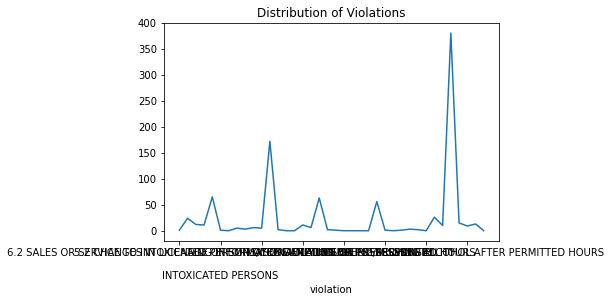

In [23]:
violations_dist.plot(title="Distribution of Violations")

In [24]:
# This distribution is not helpful unless I can clean it up. 

In [25]:
"""
Explore the penalties for the violations
"""

'\nExplore the penalties for the violations\n'

In [26]:
# The disposition var inconsistently contains a $ amount of the penalty with inconsistent formatting. 
# Use a regex to extract the penalty values.
violations_data["penalty"]=violations_data["disposition"].str.extract(r"((?<=\$)\d+)")
# This regex looks for the dollar sign (\$), then pulls all the digits (\d+) unlimited times (to the end).

In [27]:
violations_data["penalty"] # checking that the penalty amounts pulled in correctly.

0      1000
1       500
2       100
3       500
4      1600
       ... 
939    3000
940    1000
941    1000
942    1000
943    1000
Name: penalty, Length: 944, dtype: object

In [28]:
violations_data["disposition"] # checking that the disposition column remained unchanged. 

0                   $1000 +ALERT
1                    $500 +ALERT
2                    $100 +ALERT
3                    $500 +ALERT
4                   $1600 +ALERT
                 ...            
939    SETTLED; $3000.00 + ALERT
940     SETTLED; $1000.00 +ALERT
941                 $1000 +ALERT
942                 $1000 +ALERT
943                 $1000 +ALERT
Name: disposition, Length: 944, dtype: object

In [29]:
violations_data.isnull().sum() # provides a count of nulls for each var.

facilityname        0
address             0
violationdate       0
violation           0
disposition         2
dispositiondate     3
penalty            51
dtype: int64

In [30]:
# There are 51 records with no penalty value (nulls). 
# Some records did not result in a penalty being assessed.
# Need to provide a value (0) for the missing penalty amounts. 

In [31]:
# Replace missing penalty values with 0.
violations_data["penalty"]=violations_data["penalty"].fillna(0)
# change the penalty type to an integer.
violations_data["penalty"]=violations_data["penalty"].astype(int)

In [32]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600
...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000


In [35]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   facilityname     944 non-null    object        
 1   address          944 non-null    object        
 2   violationdate    944 non-null    datetime64[ns]
 3   violation        944 non-null    object        
 4   disposition      942 non-null    object        
 5   dispositiondate  941 non-null    datetime64[ns]
 6   penalty          944 non-null    int32         
dtypes: datetime64[ns](2), int32(1), object(4)
memory usage: 48.1+ KB


In [36]:
# Get counts of the number of violations at each penalty amount.
violations_data["penalty"].value_counts().sort_values(ascending=False)

1000    394
100     208
500     157
2500     76
0        53
1         8
2         7
400       6
200       6
600       5
800       3
4         2
3000      2
1800      1
1200      1
2300      1
8         1
9         1
10        1
7200      1
8000      1
333       1
2000      1
5000      1
1500      1
2900      1
2600      1
1600      1
2800      1
7         1
Name: penalty, dtype: int64

In [37]:
# Most of the violations are for $1,000, $100, or $500. 
# Look at the max value or the facility that received the highest penalty amount.
violations_data[violations_data.penalty == violations_data.penalty.max()]

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
479,SILVER SPRING HILTON HOTEL,"8727 COLESVILLE ROAD , SILVER SPRING, MD 20910",2018-04-11,SALE TO MINOR,SETTLED; $8000+ALERT,2018-08-02,8000


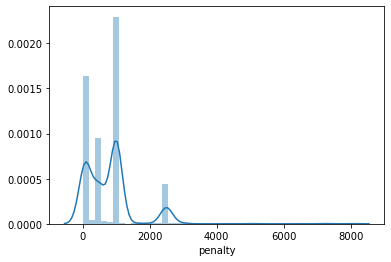

In [38]:
# Explore distribution of the penalty amounts.
sns.distplot(violations_data["penalty"])  # or can add , bins = 20)]

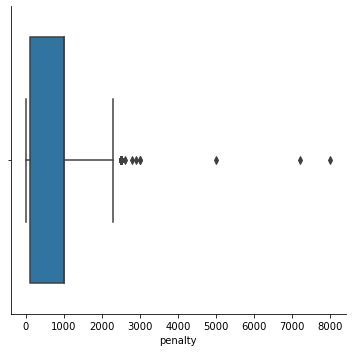

In [39]:
sns.catplot(x="penalty", kind="box", data=violations_data)

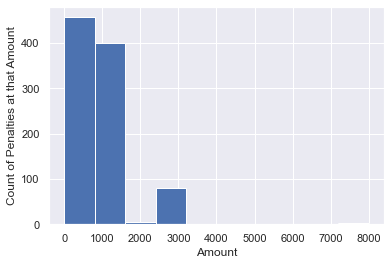

In [42]:
sns.set()
_ = plt.hist(violations_data['penalty'])
_ = plt.xlabel('Amount')
_ = plt.ylabel('Count of Penalties at that Amount')
plt.show()

In [ ]:

# Perhaps look at average amount of penalty for each kind of violation. 
# Maybe bar charts of violation amounts by type. 

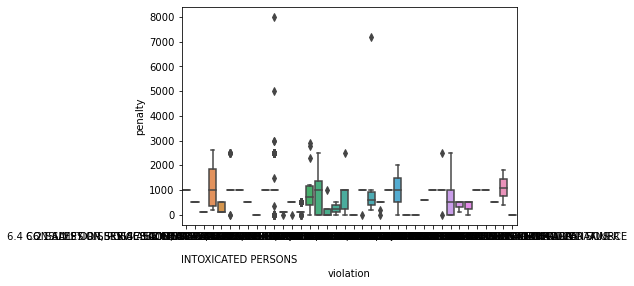

In [41]:
# box plot categorical vars
box_violations=sns.boxplot(x="violation", y="penalty", data=violations_data)

In [43]:
"""
Explore violations by zip code
"""

'\nExplore violations by zip code\n'

In [ ]:
###working on the pulling the zips better
#(?<=MARYLAND).*?(?=\s)
#r"(?<=MARYLAND).*?(?=\d+$)

#violations_data.zips=violations_data.address.split("MARYLAND",1)[1] 
#violations_data

In [52]:
# Copy the license violations zip codes into a separate var.
# Use a regular expression to pull out the zip codes.
violations_data["zip"]=violations_data["address"].str.extract(r"(\d+$)")
# This regex matches the characters (r) that are digits (\d) at the end ($). 
violations_data["zip"]=violations_data["zip"].astype(int)
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000,20902
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500,20912
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912
...,...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000,20902
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906


In [46]:
violations_data["address"]

0      2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...
1      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
2       609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910
3      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
4      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
                             ...                        
939               11423 GEORGIA AVE. , WHEATON, MD 20902
940               11423 GEORGIA AVE. , WHEATON, MD 20902
941    14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...
942         14101 GEORGIA AVE. , ASPEN HILL , MD - 20906
943    14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...
Name: address, Length: 944, dtype: object

In [47]:
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000,20902
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500,20912
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912
...,...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000,20902
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906


In [48]:
# Now I have the zip codes of the Alcohol Beverage License Violations in the var "zip".
# Do frequency of violations by zip code.

In [53]:
# Get counts of the number of violations by zip.
violations_data["zip"].value_counts().sort_values(ascending=False)

20814    116
20852    100
20850     96
20910     91
20878     89
20902     61
20877     60
20879     40
20874     34
20906     31
20876     23
20912     22
20904     18
20854     14
20815     14
20901     11
20905     10
20832     10
20872      9
20851      9
20855      9
20871      8
20817      8
20903      6
20853      6
20886      5
20816      5
20837      4
20895      4
20860      4
20818      2
2612       2
20867      2
3649       2
20833      2
20866      2
2123       2
20882      2
3414       1
4505       1
1909       1
20861      1
20841      1
2610       1
6008       1
2206       1
1112       1
5204       1
2076       1
Name: zip, dtype: int64

In [56]:
# Bethesda (20814) and Rockville (20852) have the 2 highest frequencies. 
# Other zips are incorrect and need fixed.
zip_fix=violations_data.loc[(violations_data['zip'] <= 20000)]
zip_fix.sort_values(by=["zip", "address"])

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
636,IL PIZZICO,"15209 FREDERICK ROAD , ROCKVILLE, MD 20850-1112",2017-08-25,SALE TO MINOR,SETTLED; $1000 + ALERT,2017-09-19,1000,1112
725,SOLE D'ITALIA RESTAURANT,"14324 LAYHILL ROAD , SILVER SPRING, MD 20906-1909",2017-03-10,SALE TO MINOR,SETTLED; $2500.00 + ALERT,2017-05-31,2500,1909
583,BASSETT'S,"19950 FISHER AVE. , POOLESVILLE, MD 20837-2076",2017-10-18,SALE TO MINOR,SETTLED; $1000 + ALERT,2017-11-09,1000,2076
277,KENSINGTON SUB & PIZZA,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 2089...",2019-01-30,STORAGE,SETTLED;$1000+ALERT,2019-02-25,1000,2123
624,KENSINGTON SUB & PIZZA,"3701 UNIVERSITY BLVD. W. , KENSINGTON, MD 2089...",2017-08-31,SALE TO MINOR,SETTLED; $1000 + ALERT,2017-10-04,1000,2123
872,FOREST GLEN DELI,"536 FOREST GLEN ROAD , SILVER SPRING, MD 20901...",2016-04-26,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2016-05-24,1000,2206
535,WHITE OAK CONVENIENCE STORE,"11407 LOCKWOOD DRIVE , SILVER SPRING, MD 20904...",2018-01-11,SALE TO MINOR,SETTLED; $1000+ALERT,2018-03-13,1000,2610
838,RUBY TUESDAY,"701 RUSSELL AVE. , GAITHERSBURG, MD 20877-2612",2016-06-09,SALE TO MINOR,"SETTLED; 1,000 + ALERT",2016-07-06,0,2612
839,RUBY TUESDAY,"701 RUSSELL AVE. , GAITHERSBURG, MD 20877-2612",2016-06-09,ALCOHOL AWARENESS CERTIFIED PERSON NOT ON PREM...,SETTLED; $100 + ALERT,2016-07-06,100,2612
525,KEMP MILL BEER WINE & DELI,"1339 LAMBERTON DRIVE , SILVER SPRING, MD 20902...",2018-01-17,SALE TO MINOR,SETTLED; $1000 + ALERT,2018-04-20,1000,3414


In [61]:
violations_data["zip"]=violations_data["zip"].astype(str)
violations_data['zip'] = violations_data['zip'].replace(['1112','1909','2076','2123','2206','2610','2612','3414','3649','4505','5204','6008'],['20850','20906','20837','20895','20901','20904','20877','20902','20906','20902','20814','20814'])
violations_data

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty,zip
0,HAKUNA MATATA GRILL,"2405 PRICE AVE. , SILVER SPRING , MARYLAND - 2...",2020-10-10,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-11-30,1000,20902
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-30,5.5 RECORDS,$500 +ALERT,2020-11-28,500,20912
2,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21,100,20910
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,5.5 RECORDS,$500 +ALERT,2020-11-30,500,20912
4,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19,6.9 STORAGE,$1600 +ALERT,2020-11-30,1600,20912
...,...,...,...,...,...,...,...,...
939,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2015-01-16,SALE TO MINOR,SETTLED; $3000.00 + ALERT,2016-09-09,3000,20902
940,JOSE'S GRILL,"11423 GEORGIA AVE. , WHEATON, MD 20902",2012-12-20,SALE TO MINOR,SETTLED; $1000.00 +ALERT,2016-09-09,1000,20902
941,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...",2012-10-19,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906
942,SEVEN-ELEVEN STORE,"14101 GEORGIA AVE. , ASPEN HILL , MD - 20906",2012-06-20,"6.4 CONSUMPTION, POSSESSION, OR SALE DURING PR...",$1000 +ALERT,2020-09-24,1000,20906


In [63]:
# Get counts of the number of violations by zip.
violations_data["zip"].value_counts().sort_values(ascending=False)

20814    118
20852    100
20850     97
20910     91
20878     89
20902     63
20877     62
20879     40
20906     34
20874     34
20876     23
20912     22
20904     19
20815     14
20854     14
20901     12
20905     10
20832     10
20872      9
20855      9
20851      9
20817      8
20871      8
20895      6
20903      6
20853      6
20816      5
20837      5
20886      5
20860      4
20882      2
20867      2
20866      2
20833      2
20818      2
20861      1
20841      1
Name: zip, dtype: int64

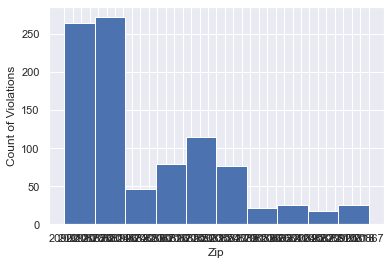

In [62]:
violations_data.sort_values(by=["zip", "facilityname"])

sns.set()
_ = plt.hist(violations_data["zip"])
_ = plt.xlabel('Zip')
_ = plt.ylabel('Count of Violations')
plt.show()

In [ ]:
# This is too messy to see the zip codes. Try again.

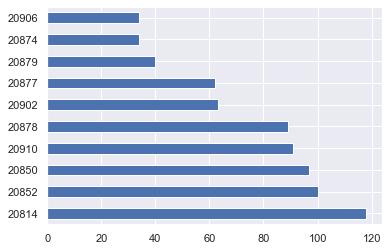

In [70]:
# This plots the top 10 most frequent zip codes. 
violations_data["zip"].value_counts()[:10].plot(kind="barh")


In [ ]:
# This has the potential to be interesting as I recognize some of the zip codes/areas. 
# I'll come back to this.

In [ ]:
### This works but there are too many zip codes to the display is too small to read.

# facet grid of violation amounts by zip code
#grid_viol_zip = sns.FacetGrid(violations_data, col="zip")
#grid_viol_zip.map(plt.hist, "penalty")

In [ ]:
"""
Explore the violations involving minors.
"""

In [ ]:
# Investigate frequencies by types of violations. 
# Group the sale to minor and 6.1 sales or service to minors. 

In [ ]:
# Groupby() function to pull the 2 violations together.
violations_minors = violations_data.groupby("violation").get_group("SALE TO MINOR" or "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")

In [ ]:
violations_minors

In [ ]:
type(violations_minors)

In [ ]:
violations_minors.describe(include="all")

In [ ]:
# This plots top 20 zip codes for the violations involving minors.
violations_minors["zip"].value_counts()[:20].plot(kind="barh")

In [ ]:

# Get the frequency by zip code for violations involving minors. See how it compares to all violations.
# Does it follow the same frequency or do some zip codes have higher rates of violations by minors. 
# 

In [ ]:
# I may try to overlay the high school locations with areas of highest crime and/or alcohol violations. 

In [ ]:
# Import the public high schools data set.
schools_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/772q-4wm8.json").json())
schools_data.head()

In [ ]:
# Drop the unnecessary columns (i.e., category, elementary/middle schools, phone and url).

In [ ]:
high_schools=schools_data[schools_data["category"] == "HIGH SCHOOLS"]
cols_drop=["category","phone","url"]
high_schools.drop(cols_drop, inplace=True, axis=1)
print(high_schools)

In [ ]:
# Map the high school locations.

In [ ]:
# Import the plotly express package

import plotly.express as px

fig_schools = px.scatter_geo(high_schools, 
                     lon="longitude", 
                     lat="latitude",
                     # choose the map chart's projection
                     projection="albers usa",
                     center=dict(lon=-77.14, lat=39.098),
                     # columns which is in bold in the pop up
                     hover_name = "school_name",
                     # format of the popup not to display these columns' data
                     hover_data = {"longitude": False, "latitude": False})
fig_schools.show()



In [ ]:
# I'm having trouble zooming in on this map. I decided to use a different map (below) that includes streets.

In [ ]:
# Follow instructions from here: https://plotly.com/python/mapbox-layers/#openstreetmap-tiles-no-token-needed
high_schools['latitude']=high_schools['latitude'].astype(float)
high_schools['longitude']=high_schools['longitude'].astype(float)

fig_schools_map = px.scatter_mapbox(high_schools, lat="latitude", lon="longitude", hover_name="school_name", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_schools_map.update_layout(mapbox_style="open-street-map")
fig_schools_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_schools_map.show()


In [ ]:
# Note To Self: I don't know what to do about the warnings (above)
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Note To Self: While this map is OK, I can't decide what would make it better. 
# I was not able to make the points/circles bigger.
# I tried zooming in closer but then not all of the high schools show up.
# I tried to get the city to display as well as the HS name but was not able to get this to work.

In [ ]:
# Note To Self: I was able to clean the violation addresses in excel, upload to geocodio, then use that csv to map. 
# However, I want to be able to do this directly from the dataMontgomery API. 

# I tried again for the geolocation using geopy (below) following these instructions from towardsdatascience.com.
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
# I think there is a limit to how many times I can use the geolocater/site though. Not sure about that. 

In [ ]:
# Import the violations data set (I don't need to do this repeatedly but sometimes I am picking up here when I start again)
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

In [ ]:
# I had to pip install geopy on the cmd line to get this to work.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")
# Apply geolocator.geocode to the address column
violations_data["location"]=violations_data["address"].apply(geolocator.geocode)

In [ ]:
violations_data["point"]=violations_data["location"].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
# Then pull the values into 3 diff vars (the 3rd one is altitude)

In [ ]:
violations_data[["latitude", "longitude", "altitude"]] = pd.DataFrame(violations_data["point"].to_list(), index=violations_data.index)

In [ ]:
# Map the locations of the violations
fig_violations_map = px.scatter_mapbox(violations_data, lat="latitude", lon="longitude", hover_name="facilityname", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_violations_map.update_layout(mapbox_style="open-street-map")
fig_violations_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_violations_map.show()


In [ ]:
# I might need to map the using Tableau - it might be easier.

In [ ]:
# Pull in the Crash Incidents data 
# Trying to narrow down by alcohol activity because the dataset is so big.
selections = {"Driver Substance Abuse": "ALCOHOL PRESENT"}

crash_incidents_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/bhju-22kf.json",params=selections).json())
crash_incidents_data.head()

In [ ]:
crash_incidents_data.shape

In [ ]:
crash_incidents_data.describe(include="all")

In [ ]:
# Pull in the Crimes data 
# Trying to narrow by crimes against society and then crime2 for alcohol violations. 
# looking at the crimes data, there are only 8 alcohol-related crimes in the crimes data set.
# under Crime Name 2  Drunkenness,  Driving Under the Influence,  Liquor Law Violations
select_crime = {"crimename1": "Crime Against Society"}

crimes_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/icn6-v9z3.json",params=select_crime).json())
crimes_data.head()

In [ ]:
crimes_data.shape

In [ ]:
# Pull population data from this site https://worldpopulationreview.com/zips/maryland
# This is the csv link:  blob:https://worldpopulationreview.com/00124d35-9d90-48ad-973f-a3eaddcbe13e 
# this is the json link:  blob:https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b
# I downloaded MD counties with populations by zip code so I can select Montgomery County. 
# The site says it reflects 2020 population data.
blob:https://worldpopulationreview.com/087018d8-c25a-44cf-a6d9-cb479a108878
        blob:https://worldpopulationreview.com/507fea65-9f1a-483d-89a4-b640e1b3e9bb

In [ ]:
all_zip_codes_data = pd.DataFrame(requests.get("https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b").json())
all_zip_codes_data.head()

In [ ]:
pop_zip_codes = pd.read_csv('PopulationZip.csv')
pop_zip_codes.head()


In [ ]:
pop_zip_codes.shape

In [ ]:
# Get frequency of all crimes by zip code. (crimes data set has zip code column) 
# Need to calculate violations per population by zip code and crimes per population by zip code. 
# Compare alcohol violations by zip code with crimes by zip code. 

In [ ]:
# zip codes with high crime rates and zip codes with high ABS licenses and/or violations = correlation? 
# not just look at major crimes but also petty crimes. 

# Do this by taking ABS licenses (or violations) by population by zip code? 
# Then crimes by population by zip code? 